(96, 48)
Epoch 1/200
0s - loss: 116634.5847
Epoch 2/200
0s - loss: 68559.9874
Epoch 3/200
0s - loss: 38193.9905
Epoch 4/200
0s - loss: 19612.1471
Epoch 5/200
0s - loss: 9144.1541
Epoch 6/200
0s - loss: 4175.2280
Epoch 7/200
0s - loss: 2141.4509
Epoch 8/200
0s - loss: 1477.6923
Epoch 9/200
0s - loss: 1317.6440
Epoch 10/200
0s - loss: 1274.5996
Epoch 11/200
0s - loss: 1268.1934
Epoch 12/200
0s - loss: 1253.7280
Epoch 13/200
0s - loss: 1253.9886
Epoch 14/200
0s - loss: 1249.7345
Epoch 15/200
0s - loss: 1251.1009
Epoch 16/200
0s - loss: 1243.5093
Epoch 17/200
0s - loss: 1244.5084
Epoch 18/200
0s - loss: 1239.9095
Epoch 19/200
0s - loss: 1236.0884
Epoch 20/200
0s - loss: 1244.0682
Epoch 21/200
0s - loss: 1212.1806
Epoch 22/200
0s - loss: 1213.1714
Epoch 23/200
0s - loss: 1209.8025
Epoch 24/200
0s - loss: 1226.6689
Epoch 25/200
0s - loss: 1204.1847
Epoch 26/200
0s - loss: 1193.4620
Epoch 27/200
0s - loss: 1193.1781
Epoch 28/200
0s - loss: 1203.3104
Epoch 29/200
0s - loss: 1175.9147
Epoch 30/

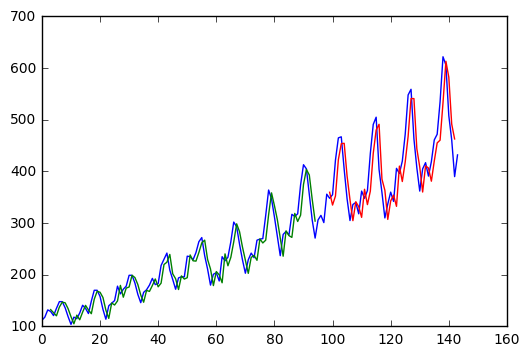

In [2]:
#to predit passengers at t+1, not just use t as input
# use a "window" , like use t,t-1,t-2 as input

# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=2)
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()